## Лабораторная работа №1 | Вариант 4

Выполнил: Кирюхин Георгий Владимирович М8О-311Б-23

### 1. Numpy

In [ ]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [ ]:
import numpy as np

arr = [1, 2, 0, 0, 4, 0]
nonzero_idx = np.nonzero(arr)[0]
print(nonzero_idx)

[0 1 4]


2. Создайте единичную матрицу размером 3х3

In [ ]:
identity_mat = np.eye(3)
print(identity_mat)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [ ]:
pattern = np.array([[0, 1], [1, 0]])
chess = np.tile(pattern, (4, 4))
print(chess)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [ ]:
arr = np.array([0, 4, 4, 2, 1, 4, 8, 7, 10, 15])
filtered = arr[(arr < 3) | (arr > 8)]
print(filtered)

[ 0  2  1 10 15]


5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [ ]:
vec = np.random.rand(10)
print("Исходный:", vec)
max_index = np.argmax(vec)
vec[max_index] = 0
print("После замены:", vec)

Исходный вектор: [0.06040883 0.23040948 0.28934839 0.83645594 0.9038361  0.67694964
 0.6263983  0.93955667 0.7217957  0.78645635]
Индекс максимального элемента: 7
Максимальный элемент: 0.9395566699214455
После замены: [0.06040883 0.23040948 0.28934839 0.83645594 0.9038361  0.67694964
 0.6263983  0.         0.7217957  0.78645635]


6. Как распечатать все значения в массиве?

In [ ]:
arr = np.arange(20).reshape(4, 5)
for val in arr.flat:
    print(val, end=' ')

Плоский вывод: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [19]:
np.random.seed(42)
points = np.random.rand(100, 2)

print("Расстояния между парами точек:")
for i in range(100):
    for j in range(i + 1, 100):
        dist = np.linalg.norm(points[i] - points[j])
        print(f"d[{i}, {j}] = {dist:.5f}")

8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [22]:
float_arr = np.random.rand(5).astype(np.float32) * 100
print("Float массив:", float_arr)
int_arr = float_arr.view(np.int32)
print("Int массив:", int_arr)

Float массив: [40.42451    9.7364645 42.6744    51.174797  86.62322  ]
Int массив: [1109504691 1092339855 1110094486 1112322814 1118650135]


9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [25]:
from io import StringIO

data_string = """1, 2, 3, 4, 5
                 6, , , 7, 8
                  , , 9,10,11"""

loaded_data = np.genfromtxt(StringIO(data_string), delimiter=',')
print(loaded_data)


[[ 1.  2.  3.  4.  5.]
 [ 6. nan nan  7.  8.]
 [nan nan  9. 10. 11.]]


10. Какой эквивалент enumerate для numpy массивов?

In [26]:
demo_array = np.array(['a', 'b', 'c', 'd'])
for idx, val in np.ndenumerate(demo_array):
    print(f"Индекс: {idx}, Значение: {val}")

Индекс: (0,), Значение: a
Индекс: (1,), Значение: b
Индекс: (2,), Значение: c
Индекс: (3,), Значение: d


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('russian-housing-market.csv')

1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [35]:
missing_life_sq = df['life_sq'].isna().sum()
print(f"Записей с отсутствующей жилой площадью: {missing_life_sq}")

Записей с отсутствующей жилой площадью: 0


2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

In [36]:
# Используем медиану жилой площади для квартир с похожей полной площадью
# Это хорошее приближение, так как обычно соотношение жилой/полной площади стабильно
df['life_sq'] = df['life_sq'].fillna(df['full_sq'] * 0.7)

3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [37]:
percentiles = df['full_sq'].quantile([0.25, 0.5, 0.75])
print(percentiles)

0.25    38.0
0.50    49.0
0.75    63.0
Name: full_sq, dtype: float64


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [39]:
filtered = df[(df['full_sq'] >= 50) & (df['full_sq'] <= 70)]
avg_price = filtered['price_doc'].mean()
print(f"Средняя стоимость: {avg_price}")

Средняя стоимость: 7243041.190994609


5. Какая максимальная этажность здания представлена в датасете

In [40]:
max_floors = df['max_floor'].max()
print(f"Максимальная этажность: {max_floors}")

Максимальная этажность: 117.0


6. Выявите район с самым дорогим жильем

In [41]:
most_expensive = df.groupby('sub_area')['price_doc'].mean().idxmax()
print(f"Самый дорогой район: {most_expensive}")

Самый дорогой район: Hamovniki


7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [46]:
mitino_data = df[df['sub_area'] == 'Mitino'].copy()
mitino_data['price_per_sqm'] = mitino_data['price_doc'] / mitino_data['full_sq']
avg_price_mitino = mitino_data['price_per_sqm'].mean()
print(f"Средняя стоимость за кв.м в Митино: {avg_price_mitino}")

Средняя стоимость за кв.м в Митино: 171841.39999559196


8. Посчитайте среднюю площадь комнаты в Бибирево

In [48]:
bibirevo = df[df['sub_area'] == 'Bibirevo'].copy()
bibirevo['room_area'] = bibirevo['life_sq'] / bibirevo['num_room']
avg_room_area = bibirevo['room_area'].mean()
print(f"Средняя площадь комнаты: {avg_room_area} кв.м")

Средняя площадь комнаты: 16.085928143712575 кв.м


9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [50]:
floor_1 = df[df['floor'] == 1]['price_doc'].mean()
floor_9 = df[df['floor'] == 9]['price_doc'].mean()
difference = abs(floor_1 - floor_9)
print(f"Средняя цена на 1 этаже: {floor_1}")
print(f"Средняя цена на 9 этаже: {floor_9}")
print(f"Разница: {difference}")

Средняя цена на 1 этаже: 5739379.587412587
Средняя цена на 9 этаже: 6937582.584373305
Разница: 1198202.9969607173


10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [51]:
filtered_apts = df[(df['life_sq'] >= 60) & (df['num_room'] >= 3) & (df['floor'] >= 5)]
min_price = filtered_apts['price_doc'].min()
print(f"Минимальная стоимость: {min_price}")

Минимальная стоимость: 1000000


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [58]:
import matplotlib.pyplot as plt

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

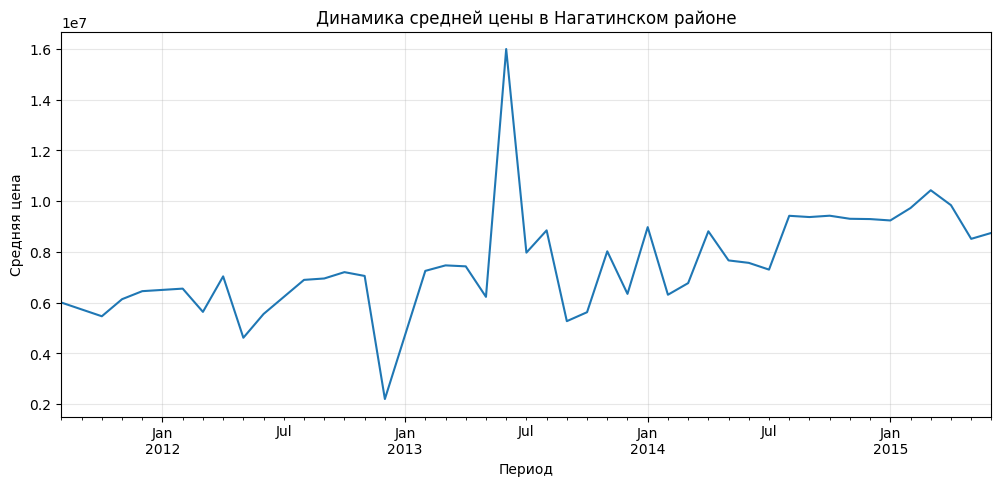

In [63]:
nagatinski = df[df['sub_area'] == 'Nagatinskij Zaton'].copy()
nagatinski['timestamp'] = pd.to_datetime(nagatinski['timestamp'])
time_series = nagatinski.groupby(nagatinski['timestamp'].dt.to_period('M'))['price_doc'].mean()

plt.figure(figsize=(12, 5))
time_series.plot()
plt.title('Динамика средней цены в Нагатинском районе')
plt.xlabel('Период')
plt.ylabel('Средняя цена')
plt.grid(True, alpha=0.3)
plt.show()

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

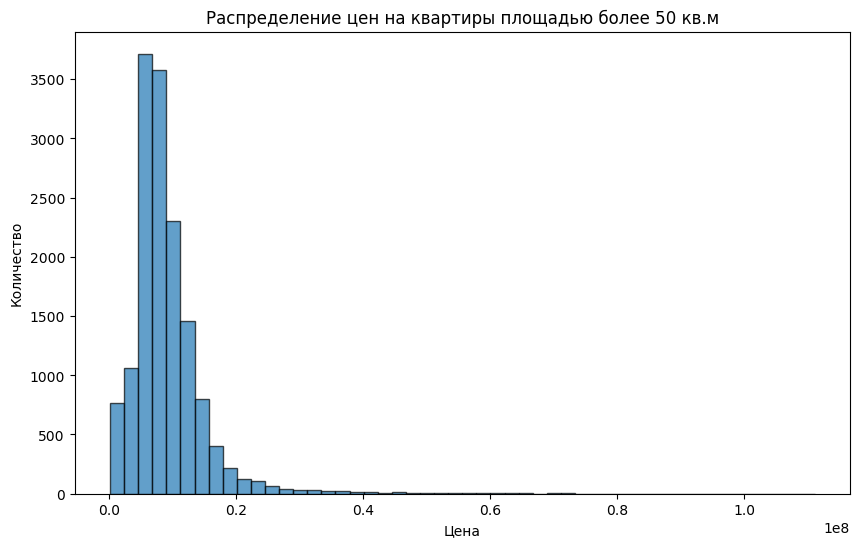

In [64]:
large_apts = df[df['full_sq'] > 50]

plt.figure(figsize=(10, 6))
plt.hist(large_apts['price_doc'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение цен на квартиры площадью более 50 кв.м')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

3. Визуализируйте количество проданных квартир в разных районах

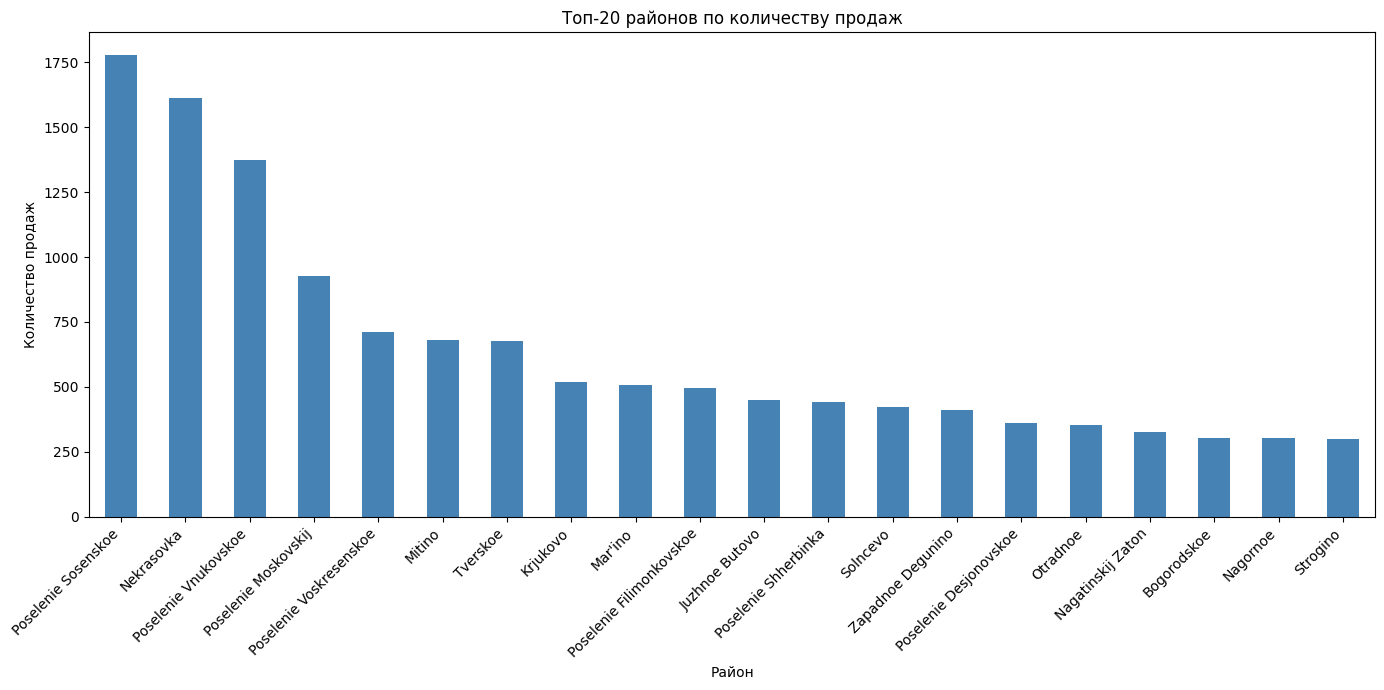

In [65]:
sales_by_area = df['sub_area'].value_counts().head(20)

plt.figure(figsize=(14, 7))
sales_by_area.plot(kind='bar', color='steelblue')
plt.title('Топ-20 районов по количеству продаж')
plt.xlabel('Район')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

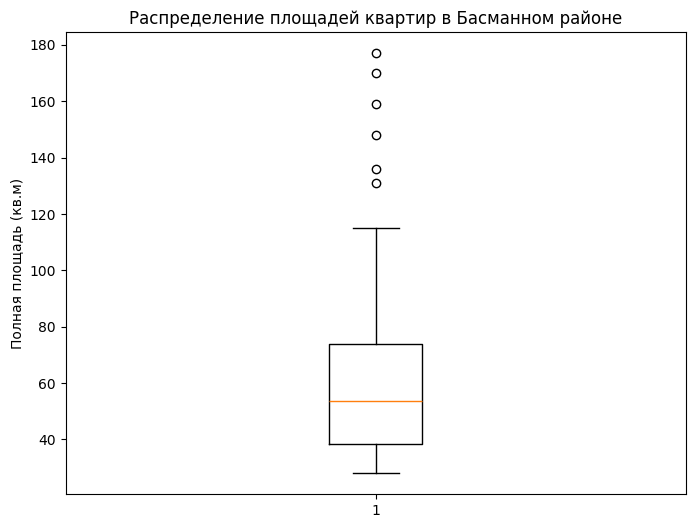

In [69]:
basmanny = df[df['sub_area'] == 'Basmannoe']

plt.figure(figsize=(8, 6))
plt.boxplot(basmanny['full_sq'].dropna())
plt.title('Распределение площадей квартир в Басманном районе')
plt.ylabel('Полная площадь (кв.м)')
plt.show()

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

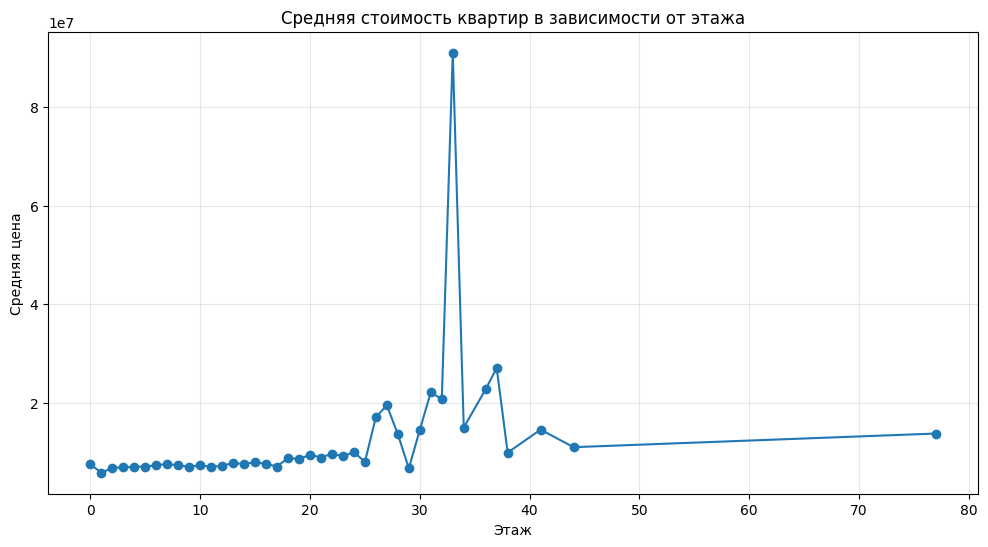

In [70]:
floor_prices = df.groupby('floor')['price_doc'].mean()

plt.figure(figsize=(12, 6))
floor_prices.plot(marker='o')
plt.title('Средняя стоимость квартир в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя цена')
plt.grid(True, alpha=0.3)
plt.show()

6. Покажите как меняется средняя площадь квартир в зависимости от района

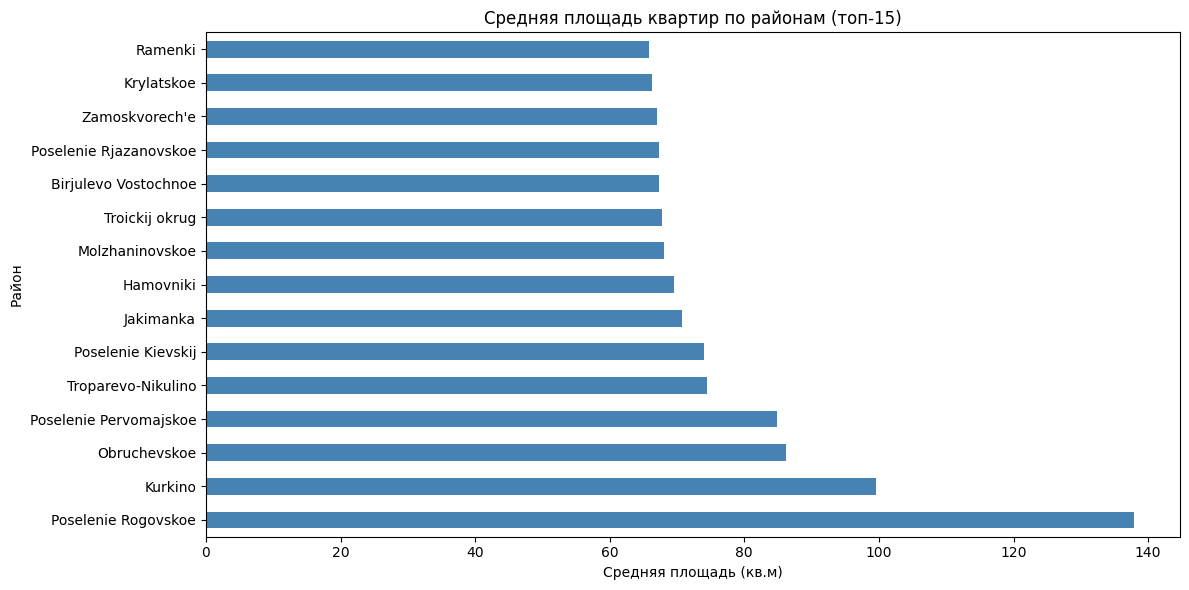

In [74]:
area_by_district = df.groupby('sub_area')['full_sq'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
area_by_district.plot(kind='barh', color='steelblue')
plt.title('Средняя площадь квартир по районам (топ-15)')
plt.xlabel('Средняя площадь (кв.м)')
plt.ylabel('Район')
plt.tight_layout()
plt.show()

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

filtered = data[(data['full_sq'] < 50) & (data['timestamp'].dt.year.between(2011, 2014))]
median_prices = filtered.groupby(filtered['timestamp'].dt.to_period('M'))['price_doc'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_prices.index.astype(str), median_prices.values, color='forestgreen')
plt.xlabel('Дата')
plt.ylabel('Медианная цена')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()